# python Data Analysis

## python modules ##

important modules, (install cmd: pip install)
* science computing [numpy, doc and official webpage](https://numpy.org/) 
* pandas [doc and official webpage](https://pandas.pydata.org/)
* plot and view tools, [matplotlib, doc and official webpage](https://matplotlib.org/)
* stock share tools [tushare pro](https://waditu.com/document/1?doc_id=37)
* stock K line plot[mplfinance], mpl_finance is deprecated, change to [mplfinance](https://github.com/matplotlib/mplfinance/archive/master.zip),github: https://github.com/matplotlib/mplfinance

In [37]:
#example tushare and matplotlib

import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

sns.set()

print(ts.__version__)

1.2.62


## get stock data by Tushare

In [38]:
df =ts.get_k_data('000002','2019-06-01','2019-09-30')
#本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [39]:
df.head(5)

,date,open,close,high,low,volume,code
99,2019-06-03,26.81,26.44,27.02,26.28,317567.0,000002
100,2019-06-04,26.47,26.30,26.54,26.25,203260.0,000002
101,2019-06-05,26.64,27.03,27.28,26.63,576164.0,000002
102,2019-06-06,27.01,27.12,27.29,26.92,333792.0,000002
103,2019-06-10,27.29,27.81,28.05,27.17,527547.0,000002


In [8]:
# get data with tushare pro

# init Tushare
ts.set_token('6195fc7c4f353480e2106c1b39c81a0226bac0d8c03ceb8da1eecf10')
pro = ts.pro_api()

# pro = ts.pro_api('Your token')

## tushare pro 以获取交易日历信息为例 方法1：##

In [9]:
df = pro.trade_cal(exchange='', start_date='20180901', 
                   end_date='20181001', 
                   fields='exchange,cal_date,is_open,pretrade_date',
                   is_open='0')

In [14]:
df.head(5)

,exchange,cal_date,is_open,pretrade_date
0,SSE,20180901,0,20180831
1,SSE,20180902,0,20180831
2,SSE,20180908,0,20180907
3,SSE,20180909,0,20180907
4,SSE,20180915,0,20180914


## tushare pro 以获取交易日历信息为例 方法2：##

In [10]:
df = pro.query('trade_cal', exchange='',
               start_date='20180901', end_date='20181001', 
               fields='exchange,cal_date,is_open,pretrade_date', is_open='0')

df.head(5)

,exchange,cal_date,is_open,pretrade_date
0,SSE,20180901,0,20180831
1,SSE,20180902,0,20180831
2,SSE,20180908,0,20180907
3,SSE,20180909,0,20180907
4,SSE,20180915,0,20180914


## tushare api ##
### 接口：stock_basic ###
* 描述：获取基础信息数据，包括股票代码、名称、上市日期、退市日期等
* 输入参数
|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码|
|list_status|str|N|上市状态： L上市 D退市 P暂停上市，默认L|
|exchange|str|N|交易所 SSE上交所 SZSE深交所 HKEX港交所(未上线)|
|is_hs|str|N|是否沪深港通标的，N否 H沪股通 S深股通|


In [12]:
#查询当前所有正常上市交易的股票列表

data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [13]:
data.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国华网安,深圳,互联网,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


### 接口：trade_cal ###
* 描述：获取各大交易所交易日历数据,默认提取的是上交所
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|exchange|str|N|交易所 SSE上交所,SZSE深交所,CFFEX 中金所,SHFE 上期所,CZCE 郑商所,DCE 大商所,INE 上能源|
|start_date|str|N|开始日期 （格式：YYYYMMDD 下同）|
|end_date|str|N|结束日期|
|is_open|str|N|是否交易 '0'休市 '1'交易|

* code example

```python
df = pro.trade_cal(exchange='', start_date='20180101', end_date='20181231')
```
或者
```python
df = pro.query('trade_cal', start_date='20180101', end_date='20181231')
```

### 接口：hs_const###
* 描述：获取沪股通、深股通成分数据
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|hs_type|str|Y|类型SH沪股通SZ深股通|
|is_new|str|N|是否最新 1 是 0 否 (默认1)|


In [14]:
#获取沪股通成分
df = pro.hs_const(hs_type='SH') 

#获取深股通成分
df = pro.hs_const(hs_type='SZ')

df

,ts_code,hs_type,in_date,out_date,is_new
0,002910.SZ,SZ,20171114,None,1
1,000016.SZ,SZ,20180102,None,1
2,001872.SZ,SZ,20180102,None,1
3,000040.SZ,SZ,20180102,None,1
4,000401.SZ,SZ,20180102,None,1
...,...,...,...,...,...
237,300723.SZ,SZ,20191216,None,1
238,300751.SZ,SZ,20191216,None,1
239,300755.SZ,SZ,20191216,None,1
240,300759.SZ,SZ,20191223,None,1


### 接口：stock_company###

* 描述：获取上市公司基础信息，单次提取4000条，可以根据交易所分批提取积分：用户需要至少120积分才可以调取，具体请参阅积分获取办法 
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码|
|exchange|str|N|交易所代码 ，SSE上交所 SZSE深交所|


In [15]:
#example 上市基本信息
df = pro.stock_company(exchange='SZSE', fields='ts_code,chairman,manager,secretary,reg_capital,setup_date,province')

In [21]:
df

,ts_code,chairman,manager,secretary,reg_capital,setup_date,province
0,300430.SZ,梁凯,梁凯,邱义鹏,27200.8896,20030722,北京
1,300333.SZ,魏恺言,魏恺言,余凯,33600.0000,20030416,广东
2,002953.SZ,冯就景,李强,孟兆滨,17387.9128,20091217,广东
3,003030.SZ,蔡祖明,蔡祖明,高锋,12478.0000,20000218,浙江
4,300550.SZ,杨一兵,戴泽宇,章逸,18992.9258,20101026,浙江
5,300392.SZ,田炳信,田炳信,田炳信,38400.0000,20011206,北京
6,300458.SZ,张建辉,李龙生,蔡霄鹏,33061.0757,20070919,广东
7,002712.SZ,任丁,俞建华,李子木,58120.2488,20000809,浙江
8,300454.SZ,何朝曦,何朝曦,蒋文光,41381.6528,20001225,广东
9,300246.SZ,燕金元,燕金元,杨永兴,14608.8000,19930628,广东


In [22]:
df.shape

(2437, 7)

### 行情数据 ###
Tushare行情数据目前已经具备高可用高稳定性，提供了包括股票、指数、基金、期货等在内的质量比较高的日线行情和分钟行情。而且也像老版本中ts.bar接口一样，提供了一个统一的行情数据输出标准接口。[online document](https://waditu.com/document/2?doc_id=15)

* 分钟行情
* 日线行情
* 周线行情
* 月线行情
* 复权行情
* 复权因子
* 停复牌信息
* 每日行情指标
* 通用行情接口

### 财务数据 ###
Pro版的财务数据跟旧版有着明显的差异，Pro提供的是完整的财务指标和全部历史数据，同时也提供质量比较高的业绩预告和业绩快报数据。我们将继续完善和充实财务指标，为大家提供更全面的反映上市公司基本面情况的数据，希望大家愉快的使用。
目前提供的主要接口有：
* 利润表
* 资产负债表
* 现金流量表
* 业绩预告
* 业绩快报

[online doc](https://waditu.com/document/2?doc_id=16)

#### 接口：daily###
数据说明：交易日每天15点～16点之间。本接口是未复权行情，停牌期间不提供数据。
调取说明：基础积分每分钟内最多调取500次，每次5000条数据，相当于23年历史，用户获得超过5000积分正常调取无频次限制。
* 描述：获取股票行情数据，或通过通用行情接口获取数据，包含了前后复权数据。
* 输入参数

|名称|类型|必选|描述       |
|----|----|----|:----------|
|ts_code|str|N|股票代码（支持多个股票同时提取，逗号分隔）|
|trade_date|str|N|交易日期（YYYYMMDD）|
|start_date|str|N|开始日期(YYYYMMDD)|
|end_date|str|N|结束日期(YYYYMMDD)|

> 注：日期都填YYYYMMDD格式，比如20181010

In [62]:
# init Tushare
ts.set_token('6195fc7c4f353480e2106c1b39c81a0226bac0d8c03ceb8da1eecf10')
pro = ts.pro_api()

df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')

#多个股票
df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')

In [63]:
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
1,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
4,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713


In [64]:
df[df['ts_code']=='600000.SH']

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,600000.SH,20180718,9.51,9.64,9.48,9.51,9.44,0.07,0.74,189227.00,180858.003
3,600000.SH,20180717,9.41,9.48,9.38,9.44,9.41,0.03,0.32,137134.95,129512.091
5,600000.SH,20180716,9.50,9.54,9.34,9.41,9.49,-0.08,-0.84,144141.19,135697.106
6,600000.SH,20180713,9.57,9.58,9.46,9.49,9.47,0.02,0.21,150263.39,142708.347
9,600000.SH,20180712,9.41,9.61,9.39,9.57,9.38,0.19,2.03,197048.37,188206.858
11,600000.SH,20180711,9.37,9.44,9.32,9.38,9.57,-0.19,-1.99,152039.33,142450.919
13,600000.SH,20180710,9.61,9.65,9.50,9.57,9.60,-0.03,-0.31,124028.37,118668.133
15,600000.SH,20180709,9.37,9.63,9.37,9.60,9.37,0.23,2.45,221725.65,212109.327
16,600000.SH,20180706,9.31,9.43,9.17,9.37,9.26,0.11,1.19,225944.43,210564.106
18,600000.SH,20180705,9.26,9.35,9.22,9.26,9.31,-0.05,-0.54,164954.38,152978.661


## matplotlib example
解决matplotlib 中文显示问题的各种方法：
https://www.jb51.net/article/134546.htm

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
import re as re

for fnt in fm.findSystemFonts():
    if re.match('.*san.*',fnt,re.I):
        print(fnt)
    if re.match('.*sim*',fnt,re.I):
        print(fnt)
print(fm.FontProperties())
#print(plt.rcParams.keys())
#print((fm.get_fontconfig_fonts('.*san.*')))
#print(fm.get_font('*san*'))

C:\WINDOWS\Fonts\BOOKOSI.TTF
C:\Windows\Fonts\REFSAN.TTF
C:\WINDOWS\Fonts\TEMPSITC.TTF
C:\Windows\Fonts\BOOKOSI.TTF
C:\WINDOWS\Fonts\HPSimplified_Bd.ttf
C:\WINDOWS\Fonts\SIMYOU.TTF
C:\Windows\Fonts\TEMPSITC.TTF
C:\WINDOWS\Fonts\LSANSD.TTF
C:\WINDOWS\Fonts\HPSimplified_Rg.ttf
C:\WINDOWS\Fonts\simfang.ttf
C:\WINDOWS\Fonts\SitkaZ.ttc
C:\Windows\Fonts\timesi.ttf
C:\WINDOWS\Fonts\GOUDOSI.TTF
C:\Windows\Fonts\GOUDOSI.TTF
C:\WINDOWS\Fonts\LSANSI.TTF
C:\WINDOWS\Fonts\LSANSI.TTF
C:\Windows\Fonts\HPSimplified_It.ttf
C:\Windows\Fonts\HPSimplified_Bd.ttf
C:\WINDOWS\Fonts\simsunb.ttf
C:\WINDOWS\Fonts\HPSimplified_It.ttf
C:\Windows\Fonts\GILSANUB.TTF
C:\WINDOWS\Fonts\HPSimplified_BdIt.ttf
C:\WINDOWS\Fonts\HARLOWSI.TTF
C:\WINDOWS\Fonts\REFSAN.TTF
C:\WINDOWS\Fonts\SitkaB.ttc
C:\WINDOWS\Fonts\GILSANUB.TTF
C:\WINDOWS\Fonts\simhei.ttf
C:\Windows\Fonts\simkai.ttf
C:\Windows\Fonts\HPSimplified_LtIt.ttf
C:\Windows\Fonts\SitkaI.ttc
C:\Windows\Fonts\HPSimplified_Rg.ttf
C:\Windows\Fonts\SitkaB.ttc
C:\WINDOWS\F

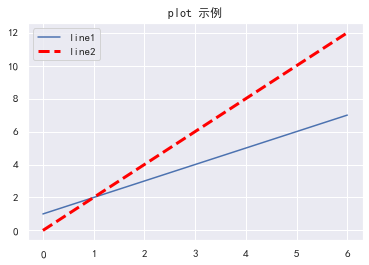

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3,4,5,6])

# line 1: y = x + 1
y1 = x1 + 1
plt.plot(x1,y1) # default settings

# Line 2: y = x * 2
y2 = x1 * 2

# color, linewidth in pixel, linestyle, default is solid
plt.plot(x1,y2,color='red', linewidth=3,
        linestyle='--')

# example of bar
x2 = [1,2,3,4,5]
y3 = [5,4,3,2,1]
#plt.bar(x2,y3,color='cyan')
# 设置图例

plt.legend(['line1','line2'],loc='upper left')

# example of text 中文
#plt.rcParams['font.family']=['SimHei']#解决正常中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']#解决正常中文显示问题 sans-serif
plt.rcParams['axes.unicode_minus']=False #解决负号显示为方块的问题
plt.title('plot 示例')
plt.show()


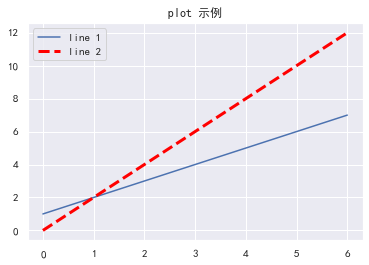

In [31]:
import matplotlib.pyplot as plt

x1 = np.array([0,1,2,3,4,5,6])

# line 1: y = x + 1
y1 = x1 + 1
line1,=plt.plot(x1,y1,label='line 1') # default settings

# Line 2: y = x * 2
y2 = x1 * 2

# color, linewidth in pixel, linestyle, default is solid
line2,=plt.plot(x1,y2,color='red', linewidth=3,
        linestyle='--',label='line 2')

# example of bar
x2 = [1,2,3,4,5]
y3 = [5,4,3,2,1]
#plt.bar(x2,y3,color='cyan')

# 设置图例
plt.legend(handles=[line1,line2],loc='upper left')
# example of text 中文
plt.title('plot 示例',fontproperties='SimHei')
plt.show()


## plot candle K-line

In [65]:
# Example close price curve
df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')

#多个股票
#df = pro.daily(ts_code='000001.SZ,600000.SH', start_date='20180701', end_date='20180718')

df.set_index('trade_date',inplace=True)
df.head()


,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20180718,000001.SZ,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
20180717,000001.SZ,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
20180716,000001.SZ,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
20180713,000001.SZ,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
20180712,000001.SZ,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828


<AxesSubplot:xlabel='trade_date'>

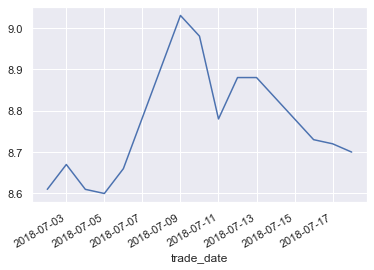

In [118]:
# plot by df methods
df.set_index('trade_date',inplace=True)
df['close'].plot()

### Tushare date converting
如果得到日期是字符串，转换成日期类型会让坐标显示更清晰
Tushare 得到的数据中日期trade_date是date。

trade-date type is: <class 'pandas.core.series.Series'>
converted trade-date type is: <class 'pandas.core.series.Series'>


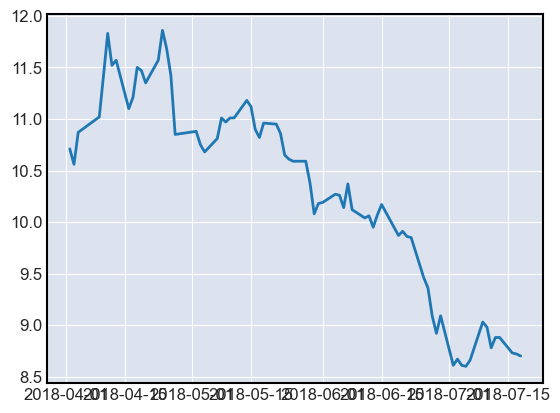

In [136]:
#
from datetime import datetime

df = pro.daily(ts_code='000001.SZ', start_date='20180401', end_date='20180718')
print('trade-date type is:',type(df['trade_date']))
df['trade_date']=df['trade_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
#df.set_index('trade_date',inplace=True)
print('converted trade-date type is:',type(df['trade_date']))
plt.plot(df['trade_date'],df['close'])
plt.show()

In [69]:
df.head()
#df.info()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20180718,000001.SZ,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
20180717,000001.SZ,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
20180716,000001.SZ,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
20180713,000001.SZ,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
20180712,000001.SZ,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828


trade-date type is: <class 'pandas.core.series.Series'>


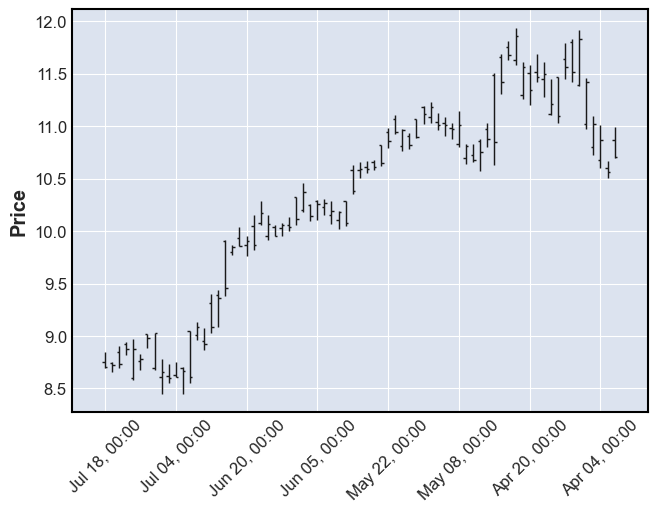

"\nmpf.candlestick_ochl(ax,df_arr,width=0.6,\n                    colorup='r',\n                    colordown='g',\n                    alpha=1.0)# plot k-line\n"

In [163]:
#example tushare and matplotlib，k-line

import tushare as ts
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns

sns.set()

from datetime import datetime

df = pro.daily(ts_code='000001.SZ', start_date='20180401', end_date='20180718')
print('trade-date type is:',type(df['trade_date']))
#df['trade_date']=df['trade_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))

#将DataFrame转换成二维数组，
#df_arr =df.values
#print(df_arr)
#df_arr[:,0]=[datetime.strptime(x,'%Y%m%d') for x in df_arr[:,0]]

df['trade_date']=df['trade_date'].apply(lambda x: datetime.strptime(x,'%Y%m%d'))
df.set_index('trade_date',inplace=True)

#fig,ax= plt.subplots(figsize=(15,6))

mpf.plot(df)
'''
mpf.candlestick_ochl(ax,df_arr,width=0.6,
                    colorup='r',
                    colordown='g',
                    alpha=1.0)# plot k-line
'''

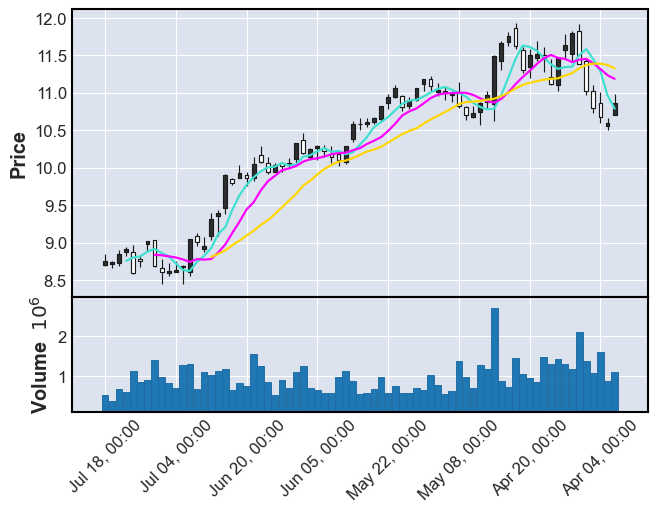

In [164]:
#the original column name of Volume is 'vol',change it to Volume
df.columns=['ts_code', 'Open', 'High', 'Low', 'Close', 'Pre_close', 'Change',
       'Pct_chg', 'Volume', 'Amount']
mpf.plot(df,type='candle',mav=[4,8,16],volume=True)
#df.head()

In [110]:
df.index.name='Date'
df.loc[:,['open','high','low','close']]
df.columns

Index(['ts_code', 'open', 'high', 'low', 'close', 'pre_close', 'change',
       'pct_chg', 'vol', 'amount'],
      dtype='object')

## Data Frame
* changing column names
  df.columns=[<name list>]

In [165]:
df.index

DatetimeIndex(['2018-07-18', '2018-07-17', '2018-07-16', '2018-07-13',
               '2018-07-12', '2018-07-11', '2018-07-10', '2018-07-09',
               '2018-07-06', '2018-07-05', '2018-07-04', '2018-07-03',
               '2018-07-02', '2018-06-29', '2018-06-28', '2018-06-27',
               '2018-06-26', '2018-06-25', '2018-06-22', '2018-06-21',
               '2018-06-20', '2018-06-19', '2018-06-15', '2018-06-14',
               '2018-06-13', '2018-06-12', '2018-06-11', '2018-06-08',
               '2018-06-07', '2018-06-06', '2018-06-05', '2018-06-04',
               '2018-06-01', '2018-05-31', '2018-05-30', '2018-05-29',
               '2018-05-28', '2018-05-25', '2018-05-24', '2018-05-23',
               '2018-05-22', '2018-05-21', '2018-05-18', '2018-05-17',
               '2018-05-16', '2018-05-15', '2018-05-14', '2018-05-11',
               '2018-05-10', '2018-05-09', '2018-05-08', '2018-05-07',
               '2018-05-04', '2018-05-03', '2018-05-02', '2018-04-27',
      

In [156]:
df.columns=['ts_code', 'Open', 'High', 'Low', 'Close', 'Pre_close', 'Change',
       'Pct_chg', 'Volume', 'Amount']
df.head(10)

,ts_code,Open,High,Low,Close,Pre_close,Change,Pct_chg,Volume,Amount
trade_date,,,,,,,,,,
2018-07-18,000001.SZ,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-16,000001.SZ,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
2018-07-13,000001.SZ,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
2018-07-12,000001.SZ,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
2018-07-11,000001.SZ,8.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824
2018-07-10,000001.SZ,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
2018-07-09,000001.SZ,8.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
2018-07-06,000001.SZ,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526


## mplfinance animation


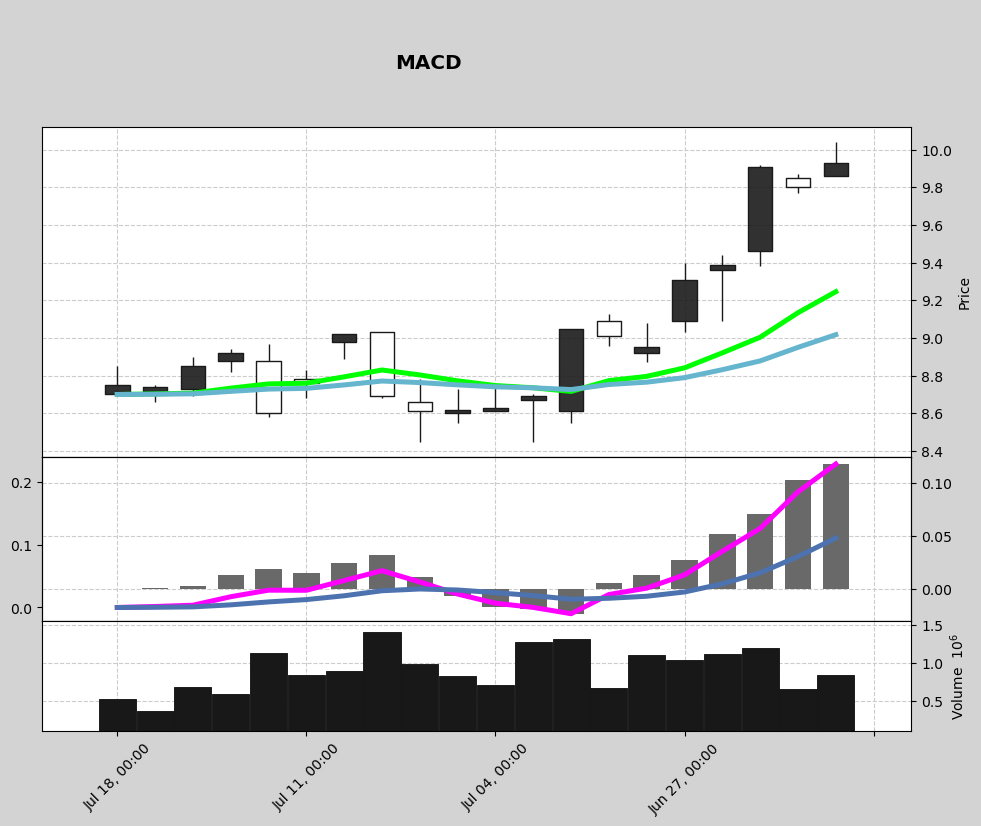

In [166]:
'''
This file contains a animation demo using mplfinance "external axes mode",
in which animate both the display of candlesticks as well as the display
of MACD (Moving Average Convergence Divergence) visual analysis.
In this example, instead of creating the Figure and Axes external to mplfiance,
we allow mplfinance to create the Figure and Axes using its "panel method", and
set kwarg `returnfig=True` so that mplfinance will return the Figure and Axes.
We then take those Axes and pass them back into mplfinance ("external axes mode")
as part of the animation.
Note that presently mplfinance does not support "blitting" (blitting makes animation
more efficient).  Nonetheless, the animation is efficient enough to update at least
once per second, and typically more frequently depending on the size of the plot.
'''
import pandas as pd
import mplfinance as mpf
import matplotlib.animation as animation

mpf.__version__

#idf = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)

idf = df
'''
idf.shape
idf.head(3)
idf.tail(3)
df = idf.loc['2018-04-02':'2018-7-18',:]
'''
# =======
#  MACD:

df = df.iloc[0:20]

exp12     = df['Close'].ewm(span=12, adjust=False).mean()
exp26     = df['Close'].ewm(span=26, adjust=False).mean()
macd      = exp12 - exp26
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

fig, axes = mpf.plot(df,type='candle',addplot=apds,figscale=1.5,figratio=(7,5),title='\n\nMACD',
                     style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2),returnfig=True)

ax_main = axes[0]
ax_emav = ax_main
ax_hisg = axes[2]
ax_macd = axes[3]
ax_sign = ax_macd
ax_volu = axes[4]

df =  idf.loc['2018-04-02':'2018-07-18',:]

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(30+ival)]
    exp12     = data['Close'].ewm(span=12, adjust=False).mean()
    exp26     = data['Close'].ewm(span=26, adjust=False).mean()
    macd      = exp12 - exp26
    signal    = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal
    apds = [mpf.make_addplot(exp12,color='lime',ax=ax_emav),
            mpf.make_addplot(exp26,color='c',ax=ax_emav),
            mpf.make_addplot(histogram,type='bar',width=0.7,
                             color='dimgray',alpha=1,ax=ax_hisg),
            mpf.make_addplot(macd,color='fuchsia',ax=ax_macd),
            mpf.make_addplot(signal,color='b',ax=ax_sign),
           ]

    for ax in axes:
        ax.clear()
    mpf.plot(data,type='candle',addplot=apds,ax=ax_main,volume=ax_volu)

ani = animation.FuncAnimation(fig,animate,interval=100)

mpf.show()

In [167]:
idf.head()

,ts_code,Open,High,Low,Close,Pre_close,Change,Pct_chg,Volume,Amount
trade_date,,,,,,,,,,
2018-07-18,000001.SZ,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
2018-07-17,000001.SZ,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2018-07-16,000001.SZ,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
2018-07-13,000001.SZ,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
2018-07-12,000001.SZ,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
